In [18]:
import re
import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.datasets import  load_files
from nltk.corpus import stopwords
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [19]:
data = pd.read_csv(r'data/spambase.data', names=[x for x in range(58)])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [20]:
data = data.fillna(data.mean())

In [21]:
X = data.iloc[:,:54]
y = data[57]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((3220, 54), (1381, 54))

# LogisticRegression

In [25]:
reg = LogisticRegression(max_iter=300)

In [26]:
warnings.filterwarnings('ignore')

grid_params = {'penalty':('l1', 'l2', 'elasticnet', 'none'),
               'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
               'C' : [0.1,0.2,0.3],
               'n_jobs': [-1],
               'random_state' : [42]
}
classifier_reg = GridSearchCV(reg, grid_params,cv=5,scoring = 'accuracy', verbose = 0)
classifier_reg.fit(X_train, y_train)
predict = classifier_reg.predict(X_test)
print(classifier_reg.best_params_)

{'C': 0.1, 'n_jobs': -1, 'penalty': 'none', 'random_state': 42, 'solver': 'sag'}


In [27]:
print('Train set score: {:.4f}%'.format(classifier_reg.score(X_train, y_train)*100))
print('Test set score: {:.4f}%'.format(classifier_reg.score(X_test, y_test)*100))

Train set score: 92.1429%
Test set score: 91.9623%


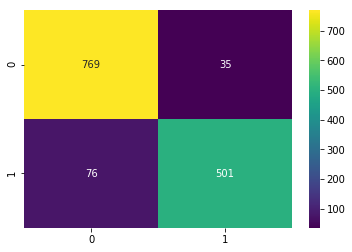

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       804
           1       0.93      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.92      1381
weighted avg       0.92      0.92      0.92      1381



In [28]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, predict))

# SVM

In [29]:
from sklearn.svm import SVC
classifier_svm = svm.SVC(max_iter=500)

In [30]:
warnings.filterwarnings('ignore')


grid_params = { 'kernel' : ('linear','rbf', 'poly','sigmoid'),
               'C' : [5,10,100],
               'random_state' : [42],
}
classifier_svm = GridSearchCV(classifier_svm, grid_params, cv = 5, scoring = 'accuracy', verbose = 0)
classifier_svm.fit(X_train, y_train.ravel())
y_pred_svm_train = classifier_svm.predict(X_train)
y_pred_svm_test = classifier_svm.predict(X_test)
print(classifier_svm.best_params_)

{'C': 5, 'kernel': 'rbf', 'random_state': 42}


In [31]:
print('Train set score: {:.4f}%'.format(classifier_svm.score(X_train, y_train)*100))
print('Test set score: {:.4f}%'.format(classifier_svm.score(X_test, y_test)*100))

Train set score: 95.5280%
Test set score: 93.5554%


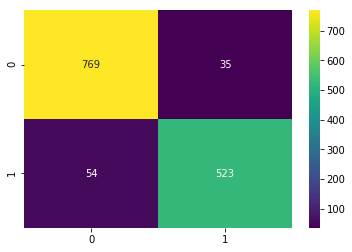

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       804
           1       0.94      0.91      0.92       577

    accuracy                           0.94      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.94      0.94      0.94      1381



In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))